In [25]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from itertools import chain
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [26]:
# sampling_rate, data = wavfile.read('sample.wav')
sampling_rate, data = wavfile.read('note.wav')
data=np.array(data).flatten()
print(np.array(data).shape)

(1312768,)


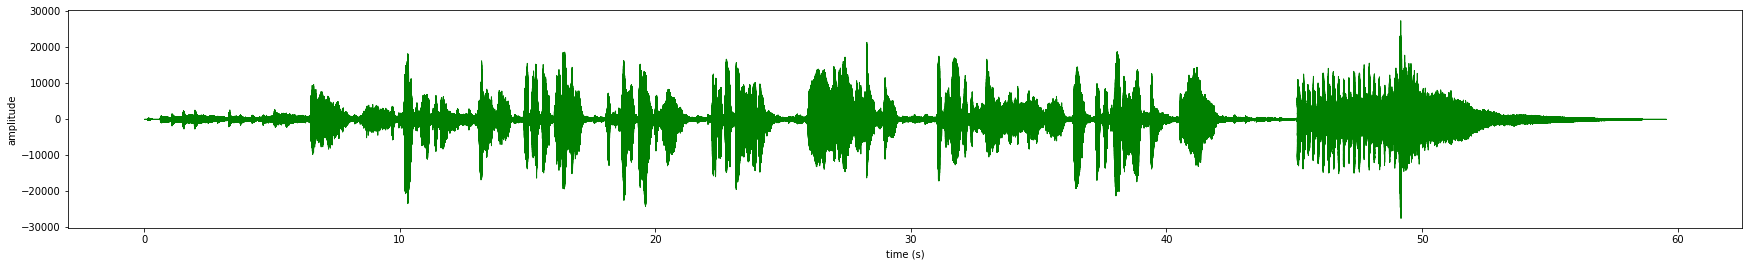

In [27]:
times = np.arange(len(data))/float(sampling_rate)
plt.figure(figsize=(30, 4))

plt.fill_between(times, data[:], color='green')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

In [28]:
frame_size = round(0.020 * sampling_rate)  
overlap_size = round(0.010 * sampling_rate)

frames = []
for i in range(0, len(data), frame_size-overlap_size):
  frames.append(data[i:i+frame_size])

In [29]:
conc_frames=np.concatenate(frames)

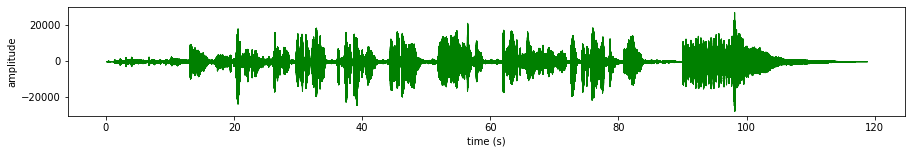

In [30]:
times = np.arange(len(conc_frames))/float(sampling_rate)
plt.figure(figsize=(15, 2))

plt.fill_between(times, conc_frames[:], color='green')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 252, 1538, 292861, 901260, 2347909, 3280183, 2784994, 2763946, 2883409, 2905446, 2635194, 1635539, 698909, 373379, 204953, 316231, 277863, 17652, 652, 122, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 190, 206714, 963075, 1456632, 932609, 568386, 657669, 595181, 657881, 765163, 453927, 116945, 525508, 1027632, 418221, 262985, 149146, 211678, 904006, 921333, 563941, 557500, 348532, -203166, -500069, -175895, 264310, 165687, 283937, 469262, -93264, -502288, -317444, -71592, -89384, -343657, -479522, -339700, -482652, -621062, -882682, -1218428, -1189542, -1757084, -1218932, -279631, 30189, 317151, 533396, 443048, 510401, 817202, 938854, 1095809, 826228, 351802, 625201, 697166, 464512, 971203, 1120964, 701491, 700258, 949807, 648224, 831608, 915071, 640328, 655025, 1113938, 899439, 533767, 971980, 1090934, 897846, 956967, 1062373, 1236316, 908402, 875767, 1249063, 1044366, 1058700, 1520812, 1614742, 1440846, 1118916,

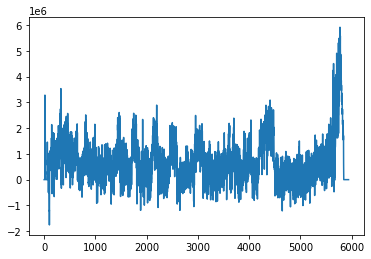

In [31]:
squared_f=[]
for i in range(len(frames)):
  frames_squared=np.square(frames[i])
  frames_squared=np.sum(frames_squared)
  squared_f.append(frames_squared)

print(squared_f)
plt.plot(squared_f)

In [32]:
count=0
zer_crossing=[]
for i in range(len(frames)):
  for j in range(len(frames[i])-1):
    if frames[i][j]*frames[i][j+1]<0:
      count=count+1
  zer_crossing.append(count)
  count=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in short_scalars
  """


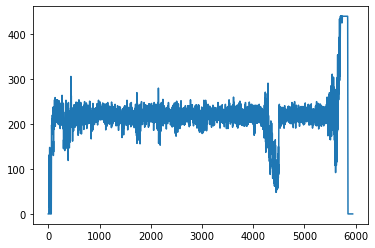

In [33]:
plt.plot(zer_crossing)